<a href="https://colab.research.google.com/github/nicole-yoong/Portfolio/blob/main/Diabetes_Detection/%5BPart_1%5D_Data_Cleaning_and_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std

import time
print("Setup complete.")

Setup complete.


# Loading data

In [ ]:
df = pd.read_csv('/content/DiabetesClassificationDataset2022.csv')
df.head(5)

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1


# Data exploration

Download the dataset and prepare a summary of the features available on the 
dataset including data type (numerical/ categorical), amount of missing data in 
individual fields. This can be included as an appendix.


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

(79159, 88)

In [ ]:
df.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

encounter_id                       0
hospital_id                        0
gender                            30
ethnicity                        961
age                             2842
elective_surgery                   0
height                          1181
weight                          2073
bmi                             2691
readmission_status                 0
icu_type                           0
h1_temp_max                    17936
h1_temp_min                    17936
d1_albumin_max                 43093
d1_albumin_min                 43093
d1_bilirubin_max               46477
d1_bilirubin_min               46477
d1_bun_max                      7910
d1_bun_min                      7910
d1_glucose_min                  4359
d1_hco3_max                    11901
d1_hco3_min                    11901
d1_inr_max                     49466
d1_inr_min                     49466
d1_lactate_max                 57809
d1_lactate_min                 57809
d1_platelets_max               11166
d

# Visualization

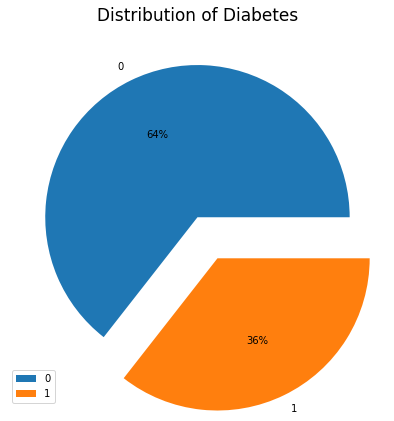

In [ ]:
X = df['diabetes_mellitus'].value_counts()
labels = ['0', '1']
plt.get_cmap('hsv')
plt.figure(figsize = (14,7))
plt.title('Distribution of Diabetes', fontsize = 17)
plt.pie(X, labels = labels, autopct='%.0f%%', explode=[0,.3])
plt.legend()
plt.show()

# Data cleaning

## Missing values

In [ ]:
#check how many missing values in each column

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing %'])
missing_data.head(88)


,Total,Missing %
h1_bilirubin_min,72849,0.920287
h1_bilirubin_max,72849,0.920287
h1_albumin_min,72271,0.912985
h1_albumin_max,72271,0.912985
h1_lactate_min,71985,0.909372
h1_lactate_max,71985,0.909372
h1_pao2fio2ratio_max,68816,0.869339
h1_pao2fio2ratio_min,68816,0.869339
h1_arterial_ph_max,65389,0.826046
h1_arterial_ph_min,65389,0.826046


In [ ]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Missing %'] > 0.6]).index,1)
df.isnull().sum().max() #just checking that there's no missing data missing...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


46477

In [ ]:
df.shape

(79159, 50)

### Random fill-in

In [ ]:
from random import choice

mask = df["gender"].isna()
df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["M","F"]))

In [ ]:
mask = df["ethnicity"].isna()
df.loc[mask,["ethnicity"]] = df.loc[mask,["ethnicity"]].applymap(lambda _: choice(["Caucasian","African American",
                                                                             'Other/Unknown', 'Hispanic', 'Asian', 'Native American']))

### Imputation 

In [ ]:
imp_df= df.fillna(method='bfill', axis=0).fillna(0)
imp_df.describe() 

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.0,79159.000000,79159.000000,...,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.454036,0.189404,169.565825,85.141136,29.602947,0.0,36.721336,36.612534,...,87.269899,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.451232,0.391831,10.831737,25.462159,8.485454,0.0,0.769038,0.793106,...,42.058765,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.800000,23.876404,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.039729,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.430000,33.421693,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#check missing values again
imp_df.isnull().sum().max() 

0

In [ ]:
df = imp_df

## Removing columns

### Removing not useful columns

In [ ]:
#drop the columns that are not useful
df = df.loc[:, ~df.columns.isin(["encounter_id", "hospital_id", 'height', 'weight','readmission_status'])]

### Remove highly correlated columns

In [ ]:
X = df.loc[:, ~df.columns.isin(['diabetes_mellitus'])]

#extract the target column
y = df["diabetes_mellitus"] 

In [ ]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['d1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'h1_glucose_min']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
df = df.loc[:, ~df.columns.isin(['d1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'h1_glucose_min'])]

## Categorical and Numerical 

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 3.4 MB/s 


In [ ]:
#divide our columns in to the categorical and numerical columns for variables that are useful for prediction of diabetes

cat_col = ["gender", "ethnicity", "icu_type"]
num_col = df.loc[:, ~df.columns.isin(["gender", "ethnicity", "icu_type"])]

In [ ]:
#Let us run loop of value_counts of each column to find out unique values. 
for col in df[cat_col]:
    print ("---- %s ---" % col)
    print (df[col].value_counts())

---- gender ---
M    42927
F    36232
Name: gender, dtype: int64
---- ethnicity ---
Caucasian           60524
African American     8989
Other/Unknown        4065
Hispanic             3298
Asian                1516
Native American       767
Name: ethnicity, dtype: int64
---- icu_type ---
Med-Surg ICU    43608
MICU             6816
CCU-CTICU        6809
Neuro ICU        6077
Cardiac ICU      5069
SICU             4902
CSICU            3138
CTICU            2740
Name: icu_type, dtype: int64


### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["ethnicity", "icu_type", 'gender']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.loc[:, df.columns.isin(["gender", "ethnicity", "icu_type"])].head(10)

,gender,ethnicity,icu_type
0,1,2,2
1,0,2,5
2,0,2,2
3,1,2,5
4,0,2,5
5,1,2,5
6,0,2,5
7,0,2,4
8,1,2,4
9,0,2,0


## Outliers

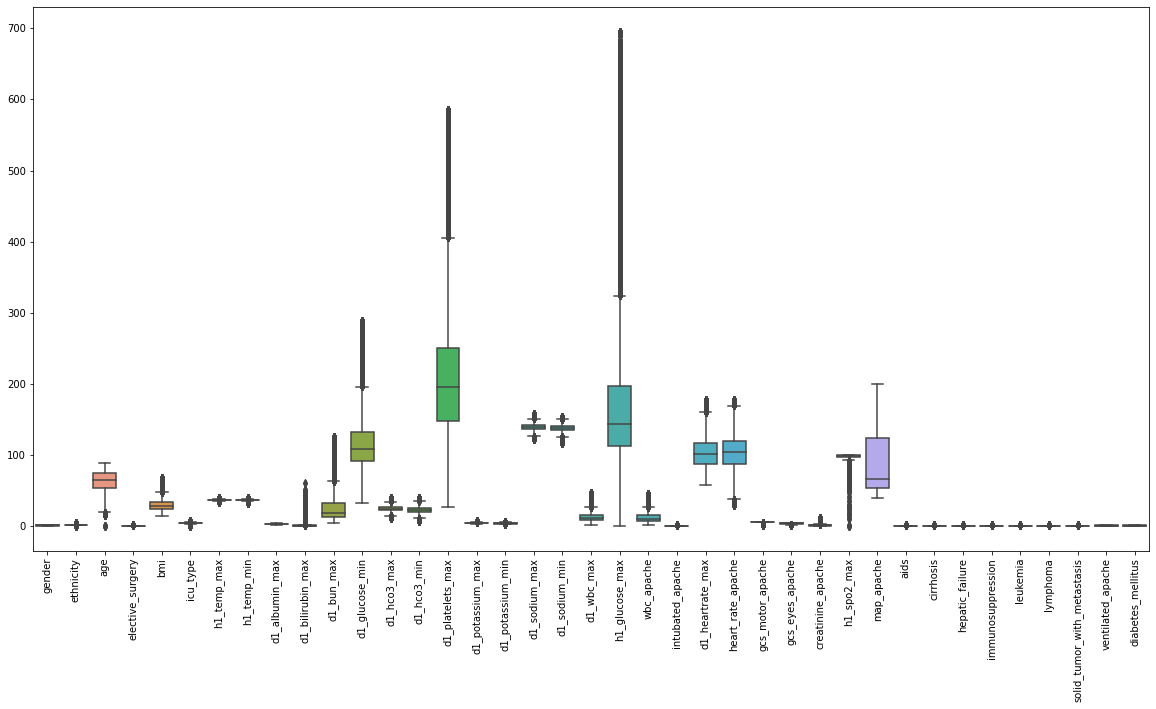

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.boxplot(data=df)
plt.show()

# Feature selection

In [ ]:
X = df.loc[:, ~df.columns.isin(["diabetes_mellitus"])]
y = df["diabetes_mellitus"] 

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(X,y)

In [ ]:
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                     Feat_names  Mutual_info
20               h1_glucose_max     0.076527
11               d1_glucose_min     0.028224
4                           bmi     0.027652
10                   d1_bun_max     0.022696
27            creatinine_apache     0.021462
9              d1_bilirubin_max     0.014232
21                   wbc_apache     0.009128
1                     ethnicity     0.008735
15             d1_potassium_max     0.008729
2                           age     0.008709
26              gcs_eyes_apache     0.005253
25             gcs_motor_apache     0.005231
0                        gender     0.004706
5                      icu_type     0.004575
13                  d1_hco3_min     0.004260
28                  h1_spo2_max     0.004206
6                   h1_temp_max     0.003802
36  solid_tumor_with_metastasis     0.003406
12                  d1_hco3_max     0.003325
18                d1_sodium_min     0.003134
16             d1_potassium_min     0.003058
8         

# Resampling Comparison

## DTC without Upsampling

### Define X and Y

In [ ]:
X = df.loc[:, df.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max', 'ethnicity', 'd1_potassium_max', 'gender', 'age'])]
y = df["diabetes_mellitus"] 


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1024, stratify=y, shuffle=True)

### No tuned 

In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(55411, 10) (55411,) (23748, 10)


In [ ]:
# compute training time
t_start = time.process_time()
dtc = DecisionTreeClassifier(random_state=1024)
dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = dtc.score(x_train, y_train)

y_pred = dtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.47328560599999747
1.0
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     15302
           1       0.45      0.46      0.45      8446

    accuracy                           0.61     23748
   macro avg       0.57      0.57      0.57     23748
weighted avg       0.61      0.61      0.61     23748



In [ ]:
display = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
display.head(10)

,Actual value,Predicted value
60909,0,1
58270,0,1
45224,0,0
58477,0,1
37339,0,0
14078,1,1
47269,0,0
3737,1,0
42096,0,1
27031,1,0


([<matplotlib.axis.YTick at 0x7f68e637f250>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

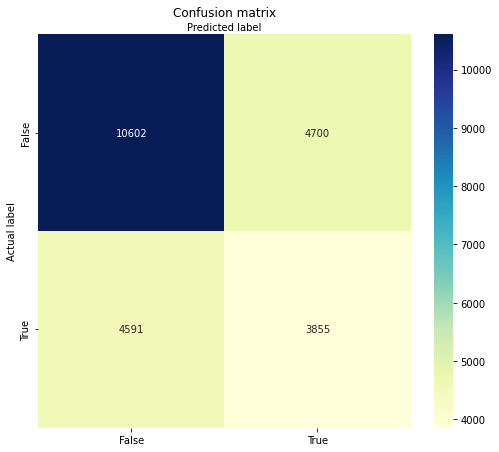

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = 5, return_train_score = True)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

8.665841272999998
0.7113389038277599
              precision    recall  f1-score   support

           0       0.73      0.87      0.79     15302
           1       0.63      0.42      0.50      8446

    accuracy                           0.71     23748
   macro avg       0.68      0.64      0.65     23748
weighted avg       0.70      0.71      0.69     23748



([<matplotlib.axis.YTick at 0x7f68e65585d0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

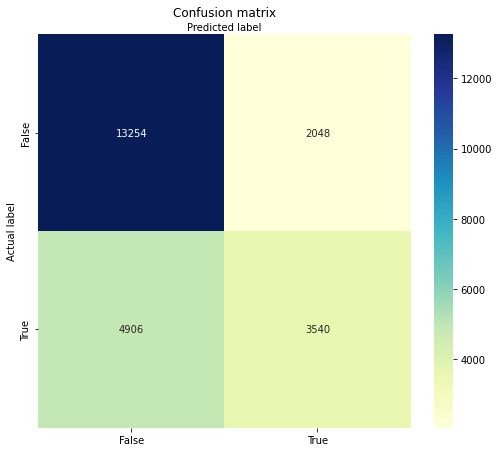

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# PLAIN UPSAMPLING

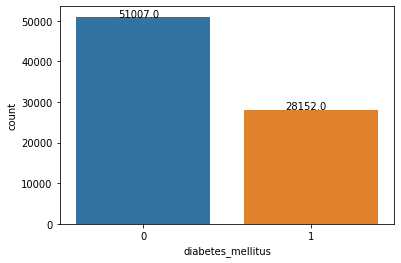

In [ ]:
ax = sns.countplot(x= 'diabetes_mellitus', data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [ ]:
from sklearn.utils import resample

df_majority = df[df.diabetes_mellitus==0]
df_minority = df[df.diabetes_mellitus==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=51007,     # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df1 = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df1.diabetes_mellitus.value_counts()

0    51007
1    51007
Name: diabetes_mellitus, dtype: int64

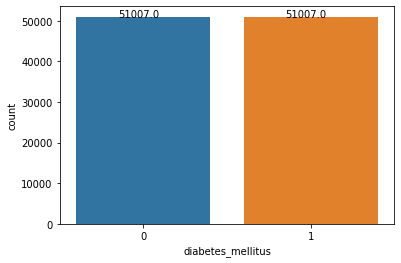

In [ ]:
ax = sns.countplot(x= 'diabetes_mellitus', data=df1)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### Define X and Y

In [ ]:
X = df1.loc[:, df1.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max', 'ethnicity', 'd1_potassium_max', 'gender', 'age'])]
                               
y = df1["diabetes_mellitus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1024)

In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(71409, 10) (71409,) (30605, 10)


## DTC

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
dtc = DecisionTreeClassifier(random_state=1024)
dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = dtc.score(x_train, y_train)

y_pred = dtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.6552746289999973
1.0
              precision    recall  f1-score   support

           0       0.56      0.69      0.62     15330
           1       0.60      0.47      0.52     15275

    accuracy                           0.58     30605
   macro avg       0.58      0.58      0.57     30605
weighted avg       0.58      0.58      0.57     30605



([<matplotlib.axis.YTick at 0x7f68e7632fd0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

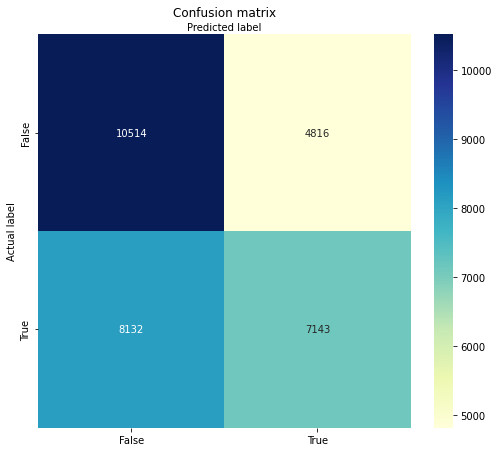

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = 5, return_train_score = True)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

13.599658175999998
0.6793821507092943
              precision    recall  f1-score   support

           0       0.66      0.69      0.67     15330
           1       0.67      0.64      0.65     15275

    accuracy                           0.66     30605
   macro avg       0.66      0.66      0.66     30605
weighted avg       0.66      0.66      0.66     30605



([<matplotlib.axis.YTick at 0x7f68e67ab810>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

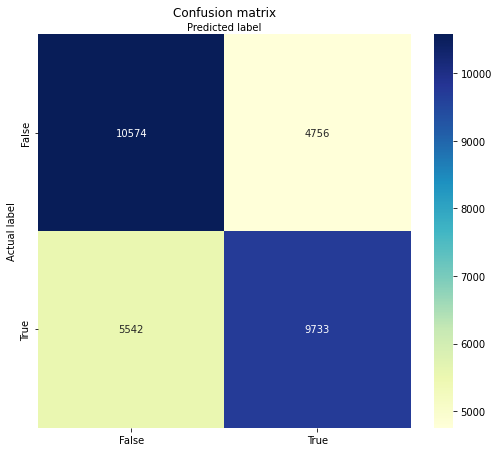

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# PLAIN DOWNSAMPLING

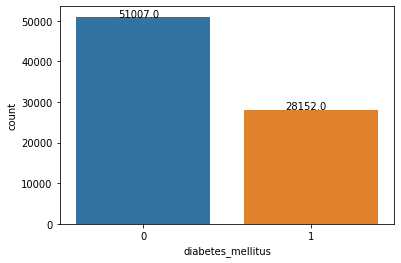

In [ ]:
ax = sns.countplot(x= 'diabetes_mellitus', data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [ ]:
from sklearn.utils import resample

df_majority = df[df.diabetes_mellitus==0]
df_minority = df[df.diabetes_mellitus==1]

# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=28152,     
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df1 = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
df1.diabetes_mellitus.value_counts()

1    28152
0    28152
Name: diabetes_mellitus, dtype: int64

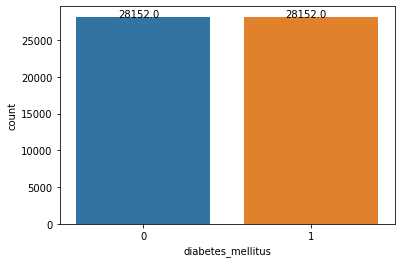

In [ ]:
ax = sns.countplot(x= 'diabetes_mellitus', data=df1)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

## Define X and Y

In [ ]:
X = df1.loc[:, df1.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max', 'ethnicity', 'd1_potassium_max', 'gender', 'age'])]
                               
y = df1["diabetes_mellitus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1024)

In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(39412, 10) (39412,) (16892, 10)


## DTC

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
dtc = DecisionTreeClassifier(random_state=1024)
dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = dtc.score(x_train, y_train)

y_pred = dtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.4245094970000025
1.0
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      8318
           1       0.50      0.50      0.50      8574

    accuracy                           0.49     16892
   macro avg       0.49      0.49      0.49     16892
weighted avg       0.49      0.49      0.49     16892



([<matplotlib.axis.YTick at 0x7f68e691b250>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

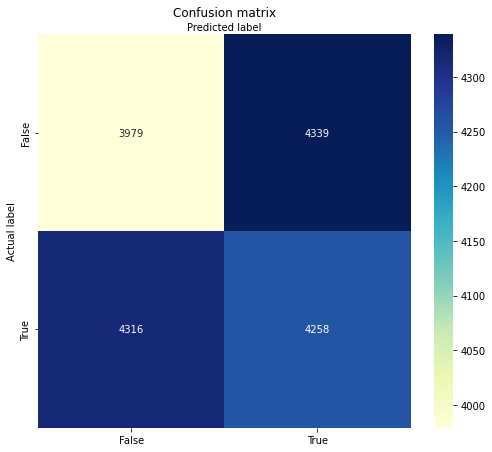

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = 5, return_train_score = True)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

5.696350163000005
0.6743377651476707
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      8318
           1       0.49      0.48      0.48      8574

    accuracy                           0.48     16892
   macro avg       0.48      0.48      0.48     16892
weighted avg       0.48      0.48      0.48     16892



([<matplotlib.axis.YTick at 0x7f68e680bcd0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

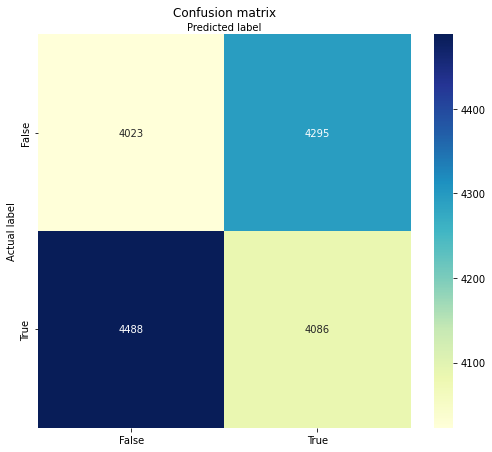

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# SMOTE 

### Define X and Y

In [ ]:
X = df.loc[:, df.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max', 'ethnicity', 'd1_potassium_max', 'gender', 'age'])]
y = df["diabetes_mellitus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1024)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1024)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of X_train: (71436, 10)
After OverSampling, the shape of y_train: (71436,) 

After OverSampling, counts of label '1': 35718
After OverSampling, counts of label '0': 35718


In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(71436, 10) (71436,) (23748, 10)


### No tune

In [ ]:
# compute training time
t_start = time.process_time()
dtc = DecisionTreeClassifier(random_state=1024)
dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = dtc.score(x_train, y_train)

y_pred = dtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.6016683799999925
1.0
              precision    recall  f1-score   support

           0       0.63      0.47      0.54     15289
           1       0.34      0.50      0.40      8459

    accuracy                           0.48     23748
   macro avg       0.48      0.48      0.47     23748
weighted avg       0.52      0.48      0.49     23748



### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = 5, return_train_score = True)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

9.456309022
0.6783274539447898
              precision    recall  f1-score   support

           0       0.60      0.46      0.52     15289
           1       0.32      0.45      0.37      8459

    accuracy                           0.46     23748
   macro avg       0.46      0.46      0.45     23748
weighted avg       0.50      0.46      0.47     23748



# Random Under Sampler

In [ ]:
X = df.loc[:, df.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max', 'ethnicity', 'd1_potassium_max', 'gender', 'age'])]
y = df["diabetes_mellitus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train.ravel())

print('After UnderSampling, the shape of X_train: {}'.format(X_train.shape))
print('After UnderSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))

After UnderSampling, the shape of X_train: (39412, 10)
After UnderSampling, the shape of y_train: (39412,) 

After UnderSampling, counts of label '1': 19706
After UnderSampling, counts of label '0': 19706


In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(39412, 10) (39412,) (23748, 10)


### No tune

In [ ]:
# compute training time
t_start = time.process_time()
dtc = DecisionTreeClassifier(random_state=1024)
dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = dtc.score(x_train, y_train)

y_pred = dtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.34150823100000594
1.0
              precision    recall  f1-score   support

           0       0.74      0.57      0.65     15302
           1       0.45      0.63      0.53      8446

    accuracy                           0.59     23748
   macro avg       0.59      0.60      0.59     23748
weighted avg       0.64      0.59      0.60     23748



## Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = 5, return_train_score = True)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

5.396250234999997
0.7371358976961332
              precision    recall  f1-score   support

           0       0.76      0.69      0.73     15302
           1       0.52      0.61      0.57      8446

    accuracy                           0.66     23748
   macro avg       0.64      0.65      0.65     23748
weighted avg       0.68      0.66      0.67     23748

